__Inputs__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


__1. You can visualize the hand signs by using image() function. For example, the code below plots images of signs with indexes 1, 156, 1435 and 10000. First line instruct to create a layout for 4 images which will be placed into 2x2 grid:
par(mfrow=c(2,2),tcl=-0.5, mai=c(0.1,0.1,0.1,0.1), xaxt='n',yaxt='n')
for(i in c(1,156,1435,10000)){
   hand sign=as.matrix(train[i,2:785])
   image(matrix(hand sign,28,28,byrow=F),col=gray.colors(255))
}
Select any letter (in the training set they are labeled by a number) and plot 16 images of signs representing that particular letter (use 4x4 grid). Discuss data variability and its impact on the classifier training.
Hint. Line id_letter=which(train$label==12) returns indices of those train set rows, which has label equal to 12. Also id_letter[1:16] returns first 16 indexes in the train data set of symbol 12.__

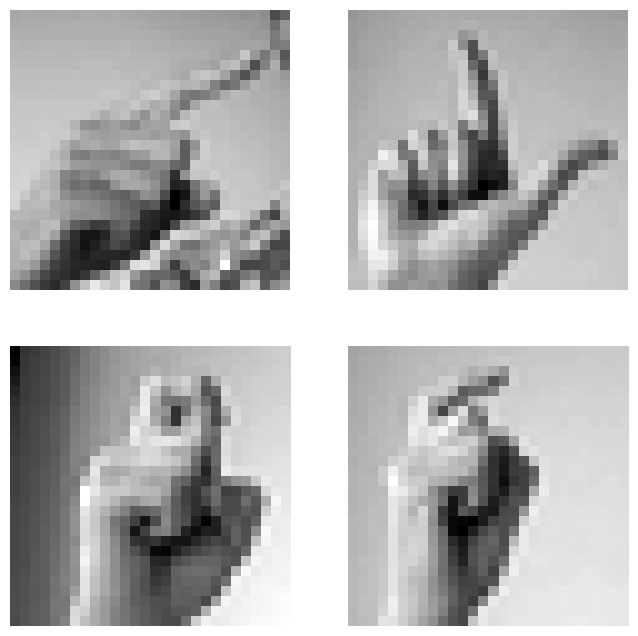

In [ ]:
train = pd.read_csv("sign_mnist_train.csv")
test = pd.read_csv("sign_mnist_test.csv")

fig, axes = plt.subplots(2, 2, figsize=(8, 8))

for i, ax in zip([1, 156, 1435, 10000], axes.flatten()):
    hand_sign = np.array(train.iloc[i, 1:]).reshape(28, 28)
    ax.imshow(hand_sign, cmap='gray')
    ax.axis('off')

plt.show()


__2. Fit LDA to train dataset and report accuracy for test dataset (perhaps a better way to do this is to visualize, because of large number of classes).
Hints: overall accuracy can be obtained by this line of code:
mean(true_labels==predicted_labels)
Accuracies for each class (given that the confusion table is named by confMat):
diag(confMat)/colSums(confMat)
diag() function returns diagonal elements of confusion matrix. colSums() calculates sums of each columns. Class accuracy is equal to the correct predictions divided by the number of test elements of that particular class.__

In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(train.iloc[:, 1:], train['label'])

lda_pred = lda.predict(test.iloc[:, 1:])

overall_accuracy = accuracy_score(test['label'], lda_pred)
print(f"Overall Accuracy: {overall_accuracy}")

conf_mat = confusion_matrix(test['label'], lda_pred)
class_accuracies = np.diag(conf_mat) / np.sum(conf_mat, axis=1)
print("Class-wise Accuracies:")
print(class_accuracies)


Overall Accuracy: 0.4326547685443391
Class-wise Accuracies:
[0.82175227 0.63194444 0.78709677 0.61632653 0.6064257  0.42105263
 0.49712644 0.53669725 0.13194444 0.3897281  0.44019139 0.25888325
 0.24054983 0.41869919 0.2074928  0.49390244 0.15972222 0.34552846
 0.47983871 0.30075188 0.26589595 0.39805825 0.3258427  0.28614458]


__3. Reduce number of features, for example, by taking only half of them (you can do this with train[,c(1,seq(2,785,2))]). Fit LDA and report back test accuracies - what do you observe? Can you reduce the number of features even more and increase LDA accuracy? Explain why this increase in accuracy by reducing the number of features may work? In you discussion include the calculation of number of unknown parameters in LDA classifier. A note: this part should be an extensive one. You have to explore a lot of different options (e.g. reduction by 2, by 3, by 4, etc.). Is is not enough to try one or two options.__

In [ ]:
half_features_train = train.iloc[:, [0] + list(range(1, 785, 2))]
half_features_test = test.iloc[:, [0] + list(range(1, 785, 2))]

lda_half = LinearDiscriminantAnalysis()
lda_half.fit(half_features_train.iloc[:, 1:], half_features_train['label'])

lda_half_pred = lda_half.predict(half_features_test.iloc[:, 1:])

overall_accuracy_half = accuracy_score(test['label'], lda_half_pred)
print(f"Overall Accuracy with Half Features: {overall_accuracy_half}")


Overall Accuracy with Half Features: 0.5050195203569436


__4. Fit QDA and report accuracies for each class in test set__

In [ ]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(train.iloc[:, 1:], train['label'])

qda_pred = qda.predict(test.iloc[:, 1:])

conf_mat_qda = confusion_matrix(test['label'], qda_pred)
class_accuracies_qda = np.diag(conf_mat_qda) / np.sum(conf_mat_qda, axis=1)
print("Class-wise Accuracies for QDA:")
class_accuracies_qda


Class-wise Accuracies for QDA:


array([1.        , 0.625     , 0.93225806, 0.92244898, 0.38353414,
       0.99190283, 0.70689655, 0.3853211 , 0.78819444, 0.68882175,
       0.89952153, 0.4035533 , 0.73539519, 0.68292683, 0.18443804,
       1.        , 0.97222222, 0.91869919, 0.58467742, 0.61278195,
       0.30346821, 0.89805825, 0.61048689, 0.63253012])

__5. Repeat the similar analysis as in part (3) and discuss the results.__

In [ ]:
def perform_feature_reduction_and_qda(train_data, test_data, reduction_factor):
    reduced_train = train_data.iloc[:, [0] + list(range(1, 785, reduction_factor))]
    reduced_test = test_data.iloc[:, [0] + list(range(1, 785, reduction_factor))]

    qda_reduced = QuadraticDiscriminantAnalysis()
    qda_reduced.fit(reduced_train.iloc[:, 1:], reduced_train['label'])

    qda_reduced_pred = qda_reduced.predict(reduced_test.iloc[:, 1:])

    overall_accuracy_reduced = accuracy_score(test_data['label'], qda_reduced_pred)

    return overall_accuracy_reduced

reduction_factors = [2, 3, 4, 5]
for reduction_factor in reduction_factors:
    accuracy = perform_feature_reduction_and_qda(train, test, reduction_factor)
    print(f"Overall Accuracy with Reduction Factor {reduction_factor}: {accuracy}")


Overall Accuracy with Reduction Factor 2: 0.6483547127718907
Overall Accuracy with Reduction Factor 3: 0.7023145566090352
Overall Accuracy with Reduction Factor 4: 0.5599553820412716
Overall Accuracy with Reduction Factor 5: 0.6939486893474623
